In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
pd.set_option('float_format', '{:f}'.format)


# Read in cleaned data
df = pd.read_csv('../../mod-2-project/data/kc_house_data_2.csv', index_col=0)

In [54]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ec83c10>,
      dtype=object)

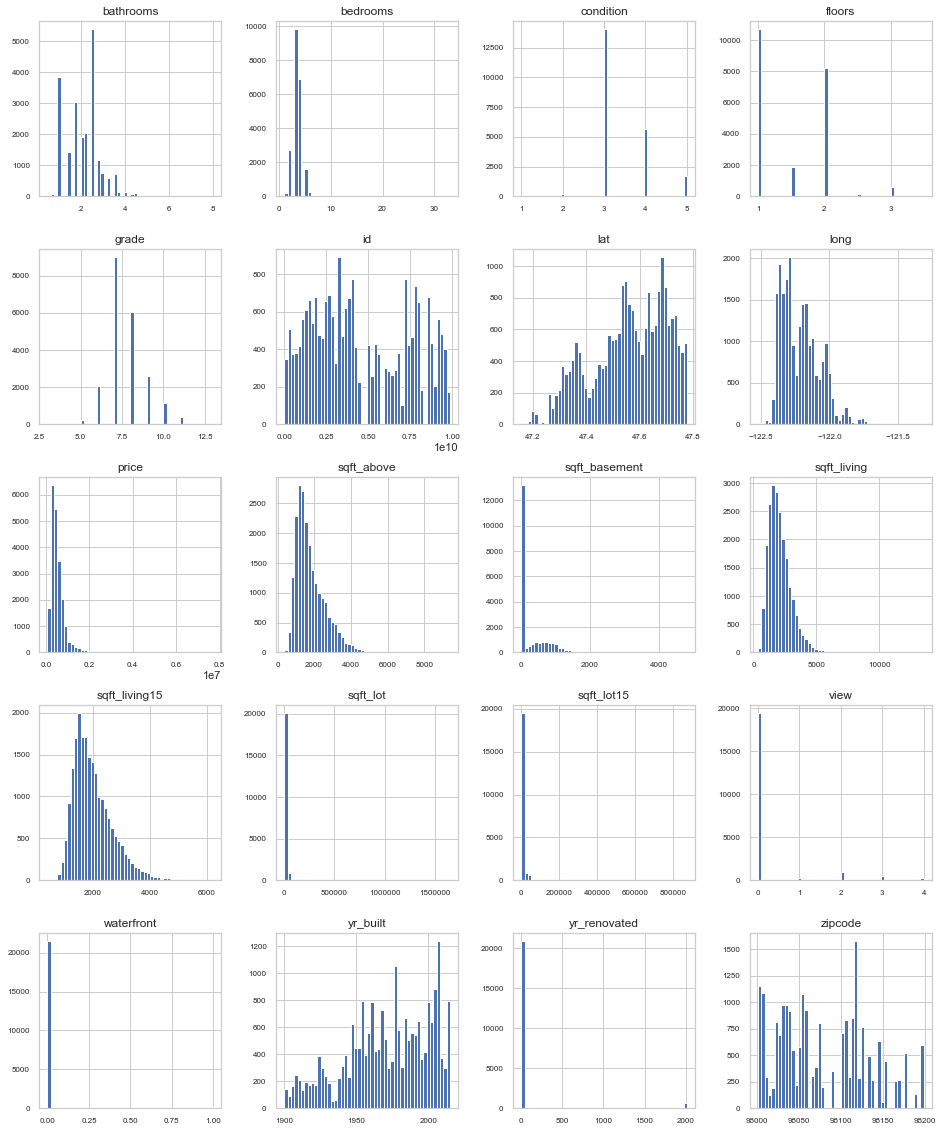

In [55]:
df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [43]:
print(df["price"].describe().apply(lambda x: format(x, 'f')))

count      21597.000000
mean      540296.573506
std       367368.140101
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object


In [26]:
df["price"].median()

450000.0

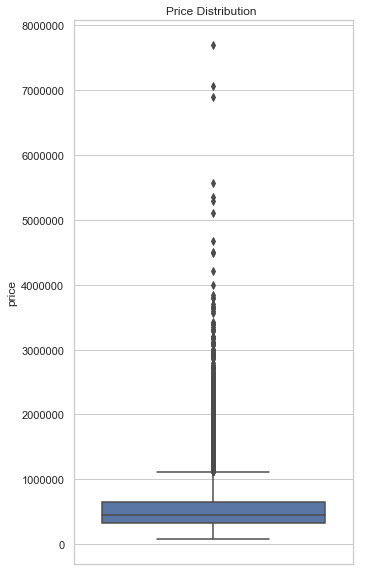

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=df["price"],showfliers=True)
plt.title("Price Distribution ")
ax 


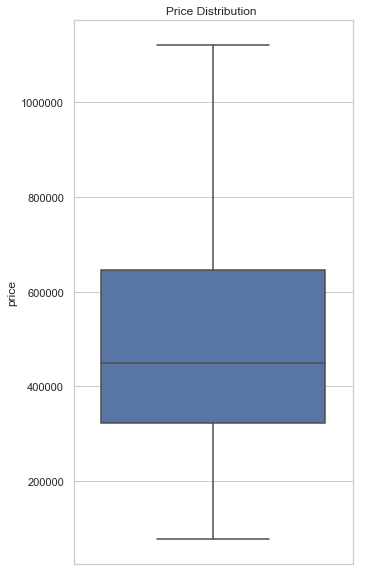

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=df["price"],showfliers=False)
plt.title("Price Distribution ")
ax 

In [86]:
q99 = df.price.quantile(.99)
pq99 = df[df['price'] < q99]

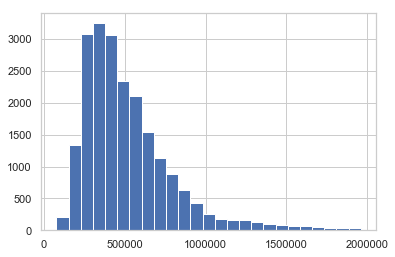

In [97]:
pq99.price.hist(bins=25,grid=True)
plt.locator_params(axis='x', nbins=6)


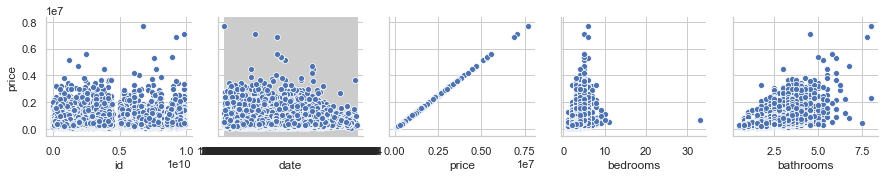

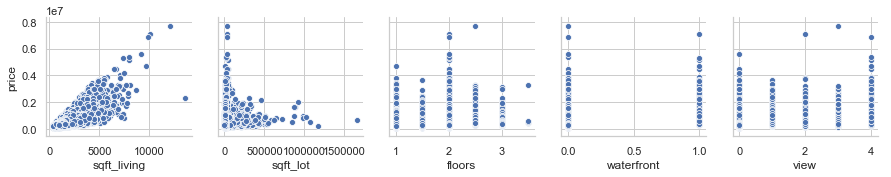

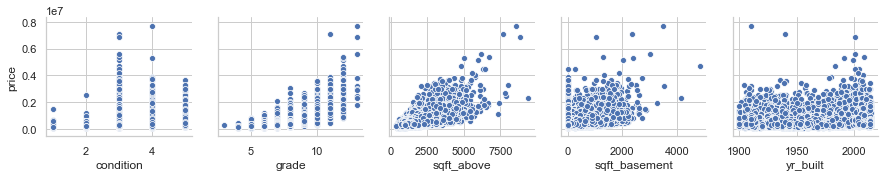

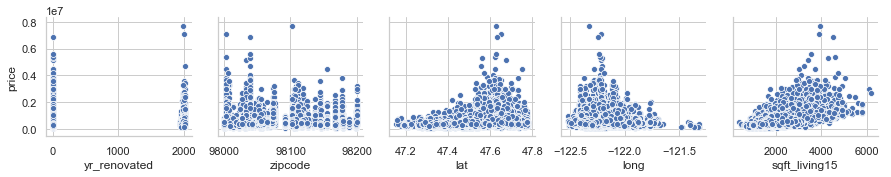

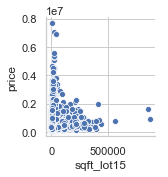

In [56]:
for i in range(0, len(df.columns),5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['price'])

In [76]:
corr_price = df.corr()['price']
corr_price[abs(df_num_corr) > 0.5].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64

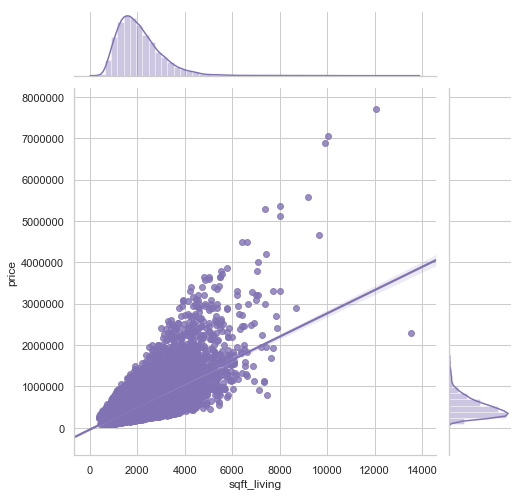

In [60]:
g = sns.jointplot("sqft_living", "price", data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)